In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline

plt.rc("font", size = 14)
import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)

In [3]:
df = pd.read_csv('winequality/winequality-white.csv',';')

In [5]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
df[df.isnull()].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

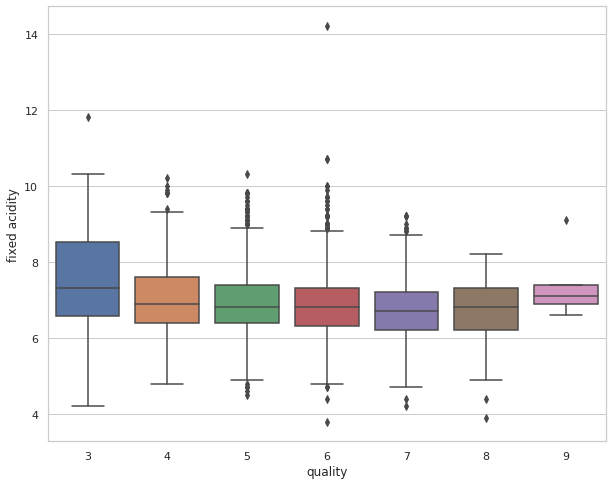

In [8]:
plt.figure(figsize = (10,8))
sns.boxplot(df['quality'],df['fixed acidity'])

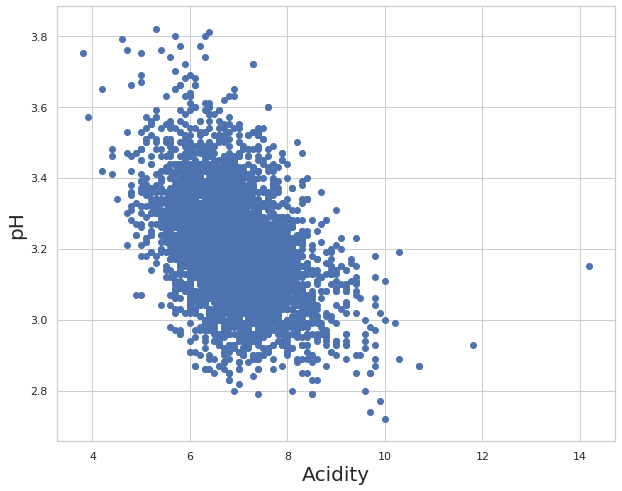

In [9]:
plt.figure(figsize = (10,8))
plt.scatter(df['fixed acidity'],df['pH'])
plt.xlabel('Acidity').set_size(20)
plt.ylabel('pH').set_size(20)

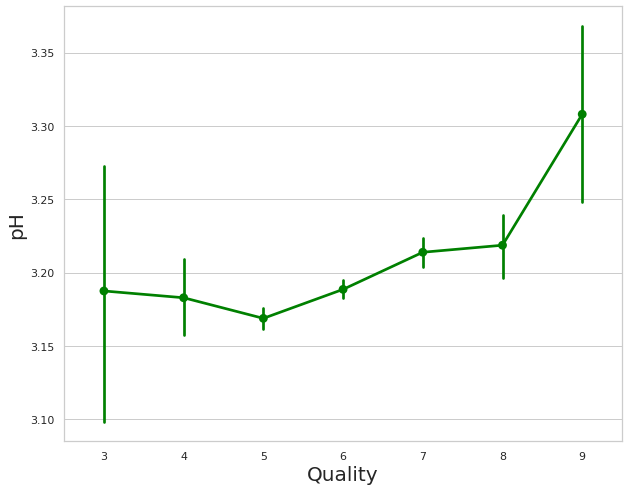

In [10]:
plt.figure(figsize = (10,8))
sns.pointplot(df['quality'],df['pH'], color = 'green')
plt.xlabel('Quality').set_size(20)
plt.ylabel('pH').set_size(20)

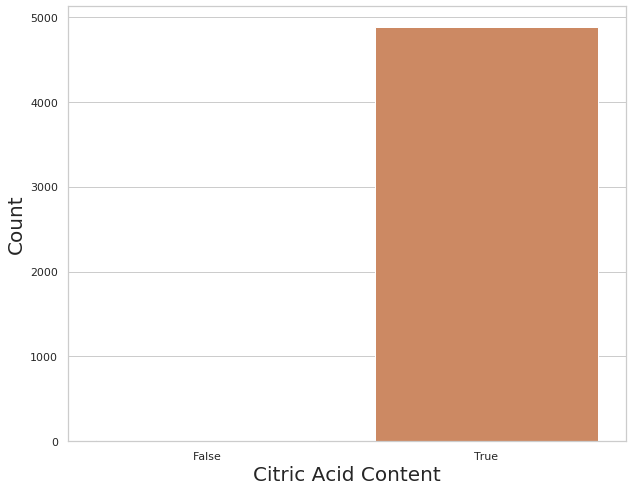

In [11]:
plt.figure(figsize = (10,8))
sns.countplot(df['citric acid'] > 0)
plt.xlabel('Citric Acid Content').set_size(20)
plt.ylabel('Count').set_size(20)

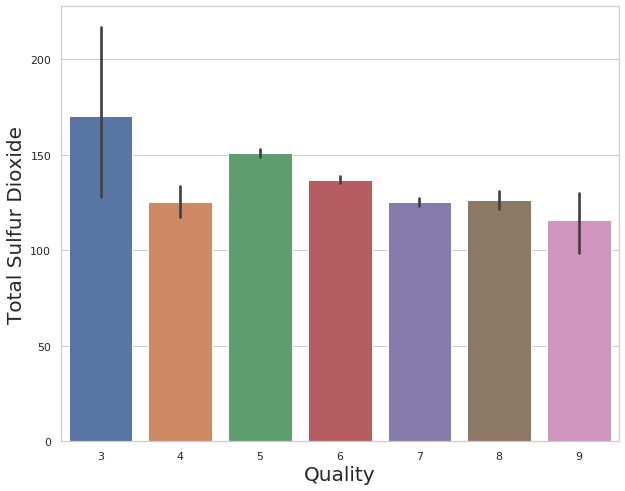

In [12]:
plt.figure(figsize = (10,8))
sns.barplot(df['quality'],df['total sulfur dioxide'])
plt.xlabel('Quality').set_size(20)
plt.ylabel('Total Sulfur Dioxide').set_size(20)

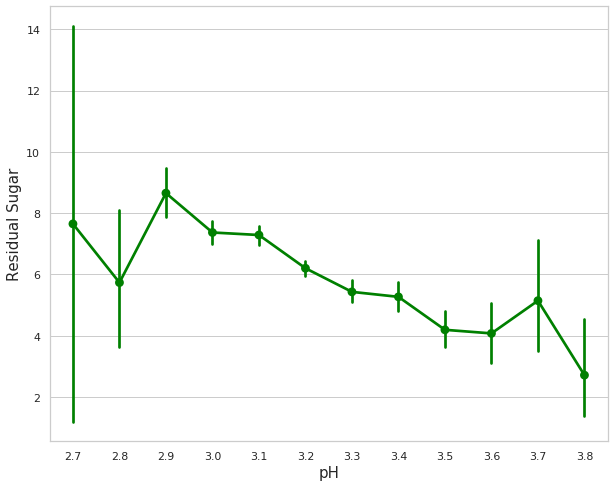

In [13]:
plt.figure(figsize = (10,8))
sns.pointplot(df['pH'].round(1),df['residual sugar'], color = 'green')
plt.xlabel('pH').set_size(15)
plt.ylabel('Residual Sugar').set_size(15)

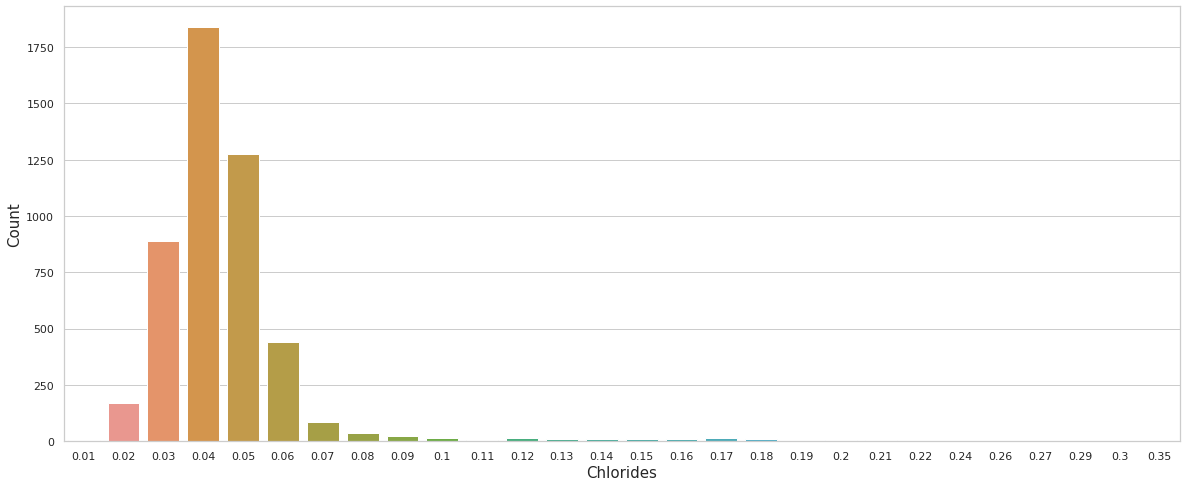

In [14]:
plt.figure(figsize = (20,8))
sns.countplot(x = df['chlorides'].round(2))
plt.xlabel('Chlorides').set_size(15)
plt.ylabel('Count').set_size(15)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
scaler.fit(df.drop(['quality'],axis = 1))
scaler_feat = scaler.transform(df.drop(['quality'],axis = 1))
wine_scaled = pd.DataFrame(scaler_feat,columns = df.columns[:-1])

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [19]:
X = wine_scaled
y = df['quality']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [21]:
lr.fit(X_train,y_train)

/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
lr_pred = lr.predict(X_test)

In [23]:
lr_conf_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test,lr_pred),index=[[3,4,5,6,7,8,9]], columns=[[3,4,5,6,7,8,9]])
print("Confusion Matrix:")
lr_conf_matrix

Confusion Matrix:


,3,4,5,6,7,8,9
3,0,0,4,2,0,0,0
4,0,0,36,24,1,0,0
5,0,0,239,193,0,0,0
6,1,0,135,522,11,0,0
7,0,0,7,216,35,0,0
8,0,0,1,37,4,0,0
9,0,0,0,1,1,0,0


In [24]:
lr_as = metrics.accuracy_score(y_test,lr_pred)
print("Accuracy Score: {}\n\n".format(lr_as))
print("Classification Report: \n{}".format(metrics.classification_report(y_test,lr_pred)))

Accuracy Score: 0.5414965986394558


Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        61
           5       0.57      0.55      0.56       432
           6       0.52      0.78      0.63       669
           7       0.67      0.14      0.23       258
           8       0.00      0.00      0.00        42
           9       0.00      0.00      0.00         2

    accuracy                           0.54      1470
   macro avg       0.25      0.21      0.20      1470
weighted avg       0.52      0.54      0.49      1470



/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtc = DecisionTreeClassifier()

In [27]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
dtc_pred = dtc.predict(X_test)

In [29]:
dtc_conf_matrix = pd.DataFrame(data = metrics.confusion_matrix(y_test,dtc_pred),index = [[3,4,5,6,7,8,9]],columns = [[3,4,5,6,7,8,9]])
print("Confusion Matrix: ")
dtc_conf_matrix

Confusion Matrix: 


,3,4,5,6,7,8,9
3,0,1,5,0,0,0,0
4,1,12,32,12,4,0,0
5,1,13,270,108,32,8,0
6,1,15,123,413,101,16,0
7,1,1,15,72,150,19,0
8,0,0,2,11,13,16,0
9,0,0,0,1,1,0,0


In [30]:
dtc_as = metrics.accuracy_score(y_test,dtc_pred)
print("Accuracy Score: {}\n\n".format(dtc_as))
print("Classification Report: \n{}".format(metrics.classification_report(y_test,dtc_pred)))

Accuracy Score: 0.5857142857142857


Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.29      0.20      0.23        61
           5       0.60      0.62      0.61       432
           6       0.67      0.62      0.64       669
           7       0.50      0.58      0.54       258
           8       0.27      0.38      0.32        42
           9       0.00      0.00      0.00         2

    accuracy                           0.59      1470
   macro avg       0.33      0.34      0.33      1470
weighted avg       0.59      0.59      0.59      1470



/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = RandomForestClassifier()

In [33]:
rfc.fit(X_train,y_train)

/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
rfc_pred = rfc.predict(X_test)

In [35]:
rfc_conf_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test,rfc_pred),index=[[3,4,5,6,7,8,9]], columns=[[3,4,5,6,7,8,9]])
print("Confusion Matrix: ")
rfc_conf_matrix

Confusion Matrix: 


,3,4,5,6,7,8,9
3,0,0,5,1,0,0,0
4,0,4,37,16,4,0,0
5,0,5,293,128,6,0,0
6,0,2,122,499,44,2,0
7,0,1,10,107,134,6,0
8,0,1,0,12,15,14,0
9,0,0,1,1,0,0,0


In [36]:
rfc_as = metrics.accuracy_score(y_test,rfc_pred)
print("Accuracy Score: {}\n\n".format(rfc_as))
print("Classification Report: \n{}".format(metrics.classification_report(y_test,rfc_pred)))

Accuracy Score: 0.6421768707482993


Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.31      0.07      0.11        61
           5       0.63      0.68      0.65       432
           6       0.65      0.75      0.70       669
           7       0.66      0.52      0.58       258
           8       0.64      0.33      0.44        42
           9       0.00      0.00      0.00         2

    accuracy                           0.64      1470
   macro avg       0.41      0.33      0.35      1470
weighted avg       0.63      0.64      0.63      1470



/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [38]:
knn_pred = knn.predict(X_test)

In [39]:
knn_conf_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test,knn_pred),index=[[3,4,5,6,7,8,9]], columns=[[3,4,5,6,7,8,9]])
print("Confusion Matrix: ")
knn_conf_matrix

Confusion Matrix: 


,3,4,5,6,7,8,9
3,0,1,4,1,0,0,0
4,0,12,30,17,2,0,0
5,1,10,260,138,20,3,0
6,3,15,108,451,84,8,0
7,1,2,12,70,153,20,0
8,0,0,1,10,12,19,0
9,0,0,0,1,1,0,0


In [40]:
knn_as = metrics.accuracy_score(y_test,knn_pred)
print("Accuracy Score: {}\n\n".format(knn_as))
print("Classification Report: \n{}".format(metrics.classification_report(y_test,knn_pred)))

Accuracy Score: 0.608843537414966


Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.30      0.20      0.24        61
           5       0.63      0.60      0.61       432
           6       0.66      0.67      0.66       669
           7       0.56      0.59      0.58       258
           8       0.38      0.45      0.41        42
           9       0.00      0.00      0.00         2

    accuracy                           0.61      1470
   macro avg       0.36      0.36      0.36      1470
weighted avg       0.60      0.61      0.61      1470



/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)

/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [42]:
svm_conf_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test,svm_pred),index=[[3,4,5,6,7,8,9]], columns=[[3,4,5,6,7,8,9]])
print("Confusion Matrix: ")
svm_conf_matrix

Confusion Matrix: 


,3,4,5,6,7,8,9
3,0,0,5,1,0,0,0
4,0,1,41,19,0,0,0
5,0,0,258,173,1,0,0
6,0,0,130,509,30,0,0
7,0,0,7,180,71,0,0
8,0,0,0,31,11,0,0
9,0,0,0,2,0,0,0


In [43]:
svm_as = metrics.accuracy_score(y_test,svm_pred)
print("Accuracy Score: {}\n\n".format(svm_as))
print("Classifcation Report: \n{}".format(metrics.classification_report(y_test,svm_pred)))

Accuracy Score: 0.5707482993197279


Classifcation Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       1.00      0.02      0.03        61
           5       0.59      0.60      0.59       432
           6       0.56      0.76      0.64       669
           7       0.63      0.28      0.38       258
           8       0.00      0.00      0.00        42
           9       0.00      0.00      0.00         2

    accuracy                           0.57      1470
   macro avg       0.40      0.24      0.24      1470
weighted avg       0.58      0.57      0.53      1470



/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
summary_table_1_1 = pd.DataFrame([lr_as,dtc_as,rfc_as,knn_as,svm_as],index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM'], columns=['Accuracy Score'])
print("Summary Table for Section 1.1")
summary_table_1_1

Summary Table for Section 1.1


,Accuracy Score
Logistic Regression,0.541497
Decision Tree,0.585714
Random Forest,0.642177
KNN,0.608844
SVM,0.570748


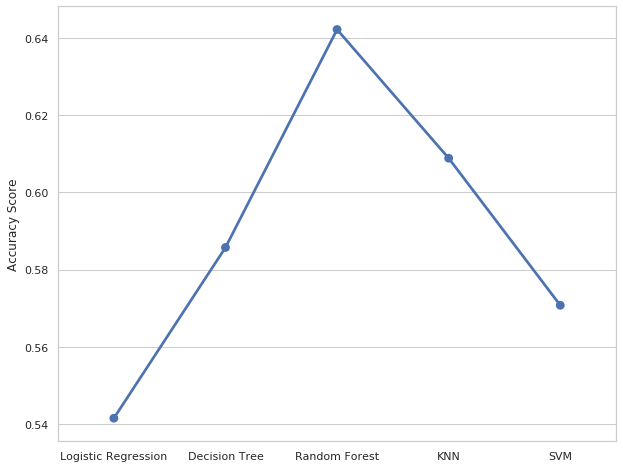

In [45]:
plt.figure(figsize = (10,8))
sns.pointplot(summary_table_1_1.index,summary_table_1_1['Accuracy Score'])

In [46]:
def encode(quality):
    if quality == 3 or quality == 4:
        return 0
    elif quality == 5 or quality == 6:
        return 1
    else:
        return 2

In [47]:
df['quality encoding'] = df['quality'].apply(encode)

In [48]:
df['quality_remarks'] = df['quality encoding'].map({0:'Poor',1:'Average',2:'Good'})

In [49]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality encoding,quality_remarks
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,Average
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,Average
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,Average
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,Average
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,Average


In [50]:
scaler = StandardScaler()
scaler.fit(df.drop(['quality','quality encoding', 'quality_remarks'],axis=1))
scaled_feat = scaler.transform(df.drop(['quality','quality encoding', 'quality_remarks'],axis=1))
wine_scaled_enc = pd.DataFrame(scaled_feat,columns=df.columns[:-3])

In [51]:
X_enc = wine_scaled_enc
y_enc = df['quality encoding']

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
lr_cross = LogisticRegression()
dtc_cross = DecisionTreeClassifier()
rfc_cross = RandomForestClassifier(n_estimators=20)
knn_cross = KNeighborsClassifier(n_neighbors=1)
svm_grid = SVC()

In [54]:
lr_scores = cross_val_score(lr_cross,X,y,cv=10,scoring='accuracy')
dtc_scores = cross_val_score(dtc_cross,X,y,cv=10,scoring='accuracy')
rfc_scores = cross_val_score(rfc_cross,X,y,cv=10,scoring='accuracy')
knn_scores = cross_val_score(knn_cross,X,y,cv=10,scoring='accuracy')

/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dhruv/anaconda3/lib/python3.7/site

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = {'C':[0.1,1,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [75]:
grid = GridSearchCV(svm_grid,param_grid)

In [76]:
grid.fit(X_train,y_train)

/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
grid_predicitons = grid.predict(X_test)

In [78]:
svm_grid_score = metrics.accuracy_score(y_test,grid_predicitons)

In [79]:
summary_table_1_2 = pd.DataFrame([lr_scores.mean(),dtc_scores.mean(),rfc_scores.mean(),knn_scores.mean(),svm_grid_score],index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM'], columns=['Accuracy Score'])
print("Summary Table for Section 1.2")
summary_table_1_2

Summary Table for Section 1.2


,Accuracy Score
Logistic Regression,0.531345
Decision Tree,0.409603
Random Forest,0.518465
KNN,0.457623
SVM,0.827211


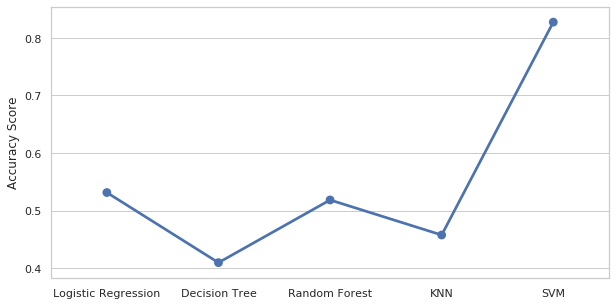

In [80]:
plt.figure(figsize=(10,5))
sns.pointplot(summary_table_1_2.index,summary_table_1_2['Accuracy Score'])